# OOP basics

Object Oriented Programing (OOP) is designed to be intuitive. Unfortuantely, if your experience is limited to functional programming it can be challenging to begin with. In this lab you are going to learn some of the basics of OOP, hopefully sufficient for what you need for this class. 

# Initialization and member functions

The basic idea of OOP is that everything is an object. An object can contain both properties and functions. When we create an object we not to tell how to initialize the object.  For example in the next cell we create a kid object with three properties (name, age, and school), and run one of its functions.

In [1]:
class kid:
    """A simple class describing a kid"""
    def __init__(self, name, age,school): #In Python have function that access memmber properties must include self
        """Initialize a kid object with their name, age, and school"""
        self.name=name  #The self.name  assigns it to a variable of the class
        self.age=age
        self.school=school
        
    def tellMeAboutYourself(self):
        """Give me the basic info"""
        print("Hi my name is %s and I am %d years old and go to %s"%(self.name,self.age,self.school))
    
k=kid("Sydney",14,"Fremont")
k.tellMeAboutYourself()

Hi my name is Sydney and I am 14 years old and go to Fremont


# Inheritence

One of the powerful concepts in OOP is the concept of inheritance. With inheritance you define a generic type, then create new objects that inherit from the generic type. Any object of the inherited type can run the methods of its parent class. It can also choose to override these methods. Take a look at the code below.  Not how the *opinion* class in *movie* is overriden by its two children.  Also note how each child class uses the *super()* function to call ints parents initialization function.

In [2]:
class movie:
    """A generic class for a movie"""

    def __init__(self,name,length):
        self.name=name
        self.length=length

    def opinion(self):
        print("No opinion on  %s"%self.name)

    def getLength(self):
        return self.length

class sciFiMovie(movie):
    def __init__(self,name,length):
        super().__init__(name,length)

    def opinion(self):
        print("This movie %s is good"%self.name)
        
class starWarsMovie(sciFiMovie):
    def __init__(self,name,length,num):
        super().__init__(name,length)
        self.num=num

    def opinion(self):
        if self.num<4:
            print("The movie %s was an embaresment"%(self.name)) 
        else:
            print("The movie %s is quite good"%self.name)
            
movies=[]
movies.append(starWarsMovie("Attack of the Clones",140,2))
movies.append((starWarsMovie("A new hope",120,4)))
movies.append(sciFiMovie("Star Trek",130))
movies.append(movie("Blazing Saddles",108))
for m in movies:
    m.opinion()
    print(m.getLength())

The movie Attack of the Clones was an embaresment
140
The movie A new hope is quite good
120
This movie Star Trek is good
130
No opinion on  Blazing Saddles
108


# Abstract classes (and concrete classes)

A special type of parent class is an abstract class. An abstract class is one where we've defined the interface for member functions but doesn't  have a  default implementation.  In the following python code you will see an example of an abstract class *shape*.  

In [3]:
import sys #So we can exit with an error

class shape:
    """A virtual class for defining a shape"""

    def __init__(self):
        """Default initialization class"""
        pass; #Don't have anything to do
    
    def inShape(self,ix,iy):
        """ Check to see if the point (ix,iy) inside a shape"""
        print("inShape has not been overritten")
        sys.exit(-1) #exit with an error

    def sameShape(self,s):
        """ Check to see if s is the same shape as the object"""
        print("sameShape has not been overritten")
        sys.exit(1)

class rectangle(shape): #Definie a rectangle with the parent class shape
    """Basic rectangle class"""
    def __init__(self,left,right,top,bot):
        """ Initializate a rectangle
        left,right,top,bot - describe rectangle coordinates"""
        super(rectangle, self).__init__()
        self.left=left
        self.right=right
        self.top=top
        self.bot=bot

    def inShape(self,ix,iy):
        """Check to see if ix,iy is inside the rectangle"""
        if ix >= self.left and ix<= self.right and iy>=self.top and  iy<=self.bot:
            return True
        else:
            return False
        
    def sameShape(self,s):
        """Return true if s is a rectangle"""
        return isinstance(s,rectangle)
    
class circle(shape): #Definie a circle with the parent class shape
    """Basic circle class"""
    def __init__(self,cx,cy,rad):
        """ Initializate a rectangle
        cx,cy - Center of the circle
        rad - radius of the circle"""
        super(circle, self).__init__()
        self.cx=cx
        self.cy=cy
        self.rad=rad
        
    def inShape(self,ix,iy):
        """Check to see if ix,iy is inside the rectangle"""
        if (ix-self.cx)*(ix-self.cx)+(iy-self.cy)*(iy-self.cy)<=self.rad*self.rad:
            return True
        else:
            return False
        
    def sameShape(self,s):
        """Return true if s is a rectangle"""
        return isinstance(s,circle)


r=rectangle(0,10,0,10)
r2=rectangle(14,14,20,20)
c=circle(7,7,4)
print("The point 2,2 in circle=",c.inShape(2,2)," in rectangle1=",r.inShape(2,2))
print("Our c and r the same object=",c.sameShape(r)," how about r and r2=",r.sameShape(r2))


The point 2,2 in circle= False  in rectangle1= True
Our c and r the same object= False  how about r and r2= True


There are many thing to observe in this class.
Next notice the function *sameShape* it takes as an argument the virtual class *shape*.  The argument *s* can only use
memebers of the *shape* class. In the *rectangle* *sameShape* function we use the *isinstance* function to check to see if *s* is the *rectangle* class.


# Part 1: Making a vector class (python)

Object oriented programming has many advantages over functional programing.  In applied sciences one advantage of object oriented programming is that we can take advantage of high-end optimization (inversion) libraries by following an object oriented model.  In this exercise you will be building some of the building blocks necessary for this approach.

The first abstract concept we will introduce is a vector.  A vector is a mathematical concept that can perform a set of operations. For this exercise we will limit ourselves to following size functions:
  - add(vec) Add the contents of another vector to the current vector
  - scale(sc) Scale a vector by a float
  - clone() Make a copy of the current vector
  - checkSame() Make sure the vector exists in the vectorSpace
  - dot(vec) Calculate the dot product of the current vector with another vector
  - random() Fill vector with random numbers
  - getNdArray() Return a numpy array version of the vector

In the next cell you will find the abstract definition of the vector.


In [4]:
import sys

class myVector:
    """An abstract vector class"""
    def __init__(self):
        pass;
    def die(self,cls):
        """ Helper function to exit when class in not defined"""
        print("Method ",cls," has not been overritten")
        self.exit(-1)
    def add(self,vec):
        """Add the contents of another vector to the current vector"""
        self.die("add")
    def scale(self,scalar):
        """Scale a vector by a scalar"""
        self.die("scale")
    def clone(self):
        """Make a copy of the vector"""
        self.die("clone")
    def dot(self,vec):
        """Dot product with another vector"""
        self.die("dot")
    def random(self):
        """Fill vector with random numbers"""
        self.die("random")
    def getNdArray(self):
        """Return a numpy array version of the vector"""
        self.die("getNdArray")

    # methods that are not provided but are nice to have for later use
    def checkSame(self,vec):
        """Check to see if two vectors are the same size"""
        self.die("checkSame")
    def zero(self):
        """Set all elements to zero"""
        self.die("zero")
    

Finish filling out the template below to create a class stlVector that implements a concrete version of myVector using numpy vectors as storage.


In [5]:
import numpy as np

class stlVector(myVector):
    """An concrete vector class using numpy arrays"""
    def __init__(self, n):
        super(stlVector, self).__init__()
        self._ar=np.zeros(n)

    def add(self,vec):
        """Add the contents of another vector to the current vector"""        
        self._ar+=vec.getNdArray()

    def scale(self,scalar):
        """Scale a vector by a scalar"""
        self._ar*=scalar

    def clone(self):
        """Make a copy of the vector"""
        vec_new = stlVector(self._ar.size)    # initialize a new vector filled with zeros
        vec_new.getNdArray()[:] = self._ar[:] # copy the contents of the old vector to the new one
        return vec_new
    
    def dot(self,vec):
        """Dot product with another vector"""
        return np.dot(self._ar, vec.getNdArray())

    def random(self):
        """Fill vector with random numbers"""
        self._ar=np.random.rand(self._ar.size)

    def getNdArray(self):
        """Return a numpy array version of the vector"""
        return self._ar
    
    # methods that are not provided but are nice to have for later use
    def checkSame(self,vec):
        """Check to see if two vectors are the same size"""
        return self._ar.size==vec.getNdArray().size
    
    def zero(self):
        """Set all elements to zero"""
        self._ar[:]=0.

Your job is to fill in the functions in the following cell to make a concrete class composed of std c++ vectors. Only two of the functions need additional work. 

You can use the next cell to see if your answer makes sense.

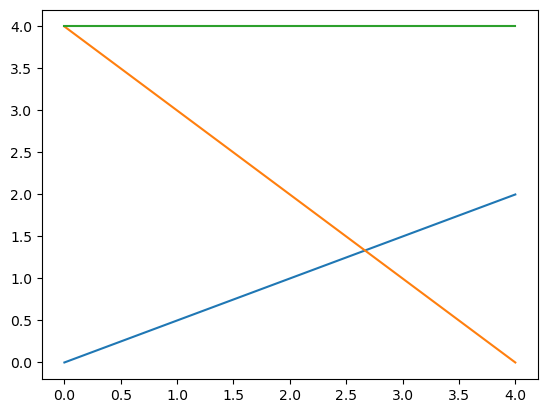

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

v1=stlVector(5)
v2=stlVector(5)

vec1=v1.getNdArray()
vec2=v2.getNdArray()

for i in range(5):
    vec1[i]=i/2.
    vec2[i]=4-i

v3=v1.clone()
vec3=v3.getNdArray()

v3.scale(2.)
v3.add(v2)

plt.plot(vec1)
plt.plot(vec2)
plt.plot(vec3)

# Part 2: Operator class




In [16]:
import math
class myOperator:
    """Generic operator class"""
    def __init__(self):
        pass;
    
    def setDomainRange(self,domainV,rangeV):
        """Set the domain and range vectors"""
        self.domainV=domainV.clone()
        self.rangeV=rangeV.clone()
        
    def checkDomainRange(self,mod,dat):
        """Check to make sure spaces match mod->domain dat->range"""
        if not self.domainV.checkSame(mod):
            raise Exception("Domain does not match")
        if not self.rangeV.checkSame(dat):
            raise Exception("Range does not match")
        
    def forward(self,add,model,data):
        raise Exception("Must override forward")
    
    def adjoint(self,add,model,data):
        raise Exception("Must override adjoint")
    
    def dotProduct(self):
        x=self.domainV.clone()
        x2=self.domainV.clone()
        y=self.rangeV.clone()
        y2=self.rangeV.clone()
        x.random()
        y.random()
        self.forward(False,x,y2)
        self.adjoint(False,x2,y)
        erro = abs(x.dot(x2) -y.dot(y2))
        if(erro >1e-4):
            raise Exception("Does not pass product test")
        else:
            print('Absolute error = ',erro)
            print("Passed dot product test!")

The abstract functions are the *forward* and *adjoint*. From what you've seen in the above sections you should be able to inherit from this class a concrete operator class (something that has a valid definition of the forward and adjoint). The class should takes as inputs the stlVector class above and uses the getNdArray function to turn them into numpy arrays that you can operate with in python.   Write an operator (derivative, matrix multiply, etc) and use the *dotProduct* function to see if your *adjoint* is truly the adjoint of your *forward*.

In [33]:
# concrete operator class of derivative
class myDeri(myOperator):
    """Concrete derivative operator"""
    def __init__(self,domainV,rangeV):
        super(myDeri, self).__init__()
        self.setDomainRange(domainV,rangeV)
        
    def forward(self,add,model,data):
        self.checkDomainRange(model,data)
        if not add:
            data.zero()
        forward1d_derivative(model.getNdArray(),data.getNdArray())
        
            
    def adjoint(self,add,model,data):
        self.checkDomainRange(model,data)
        if not add:
            model.zero()
        adjoint1d_derivative(model.getNdArray(),data.getNdArray())

def forward1d_derivative(model,data):
    """Forward derivative operator"""
    data[:-1] += model[1:]-model[:-1]

def adjoint1d_derivative(model,data):
    """Adjoint derivative operator"""
    model[1:]  += data[:-1]
    model[:-1] -= data[:-1]

In [34]:
# set up the domain and range vectors
n = 101
modl = stlVector(n)
data = stlVector(n)

# use the sin function as the model to test the derivative operator
modl.getNdArray()[:] = np.sin(np.linspace(0, 2*np.pi * 2, n))

In [35]:
# set up the operator and perform the dot product test
deri = myDeri(modl,data)
deri.dotProduct()

Absolute error =  1.1102230246251565e-16
Passed dot product test!


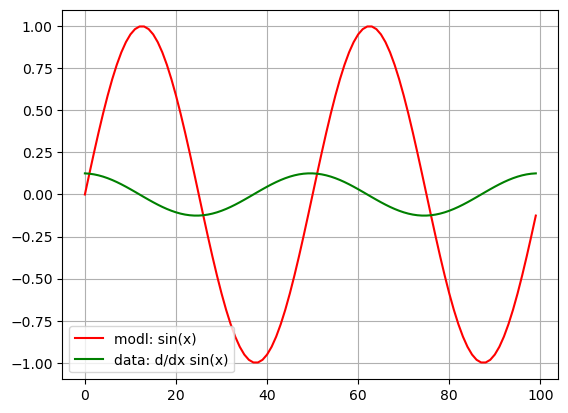

In [36]:
# forward test
data.zero()
deri.forward(False,modl,data)

# plot the data and its forward result (should be the derivative of the model)
plt.figure()
plt.plot(modl.getNdArray()[:-1], 'r-', label='modl: sin(x)')
plt.plot(data.getNdArray()[:-1], 'g-', label='data: d/dx sin(x)')
plt.legend()
plt.grid()

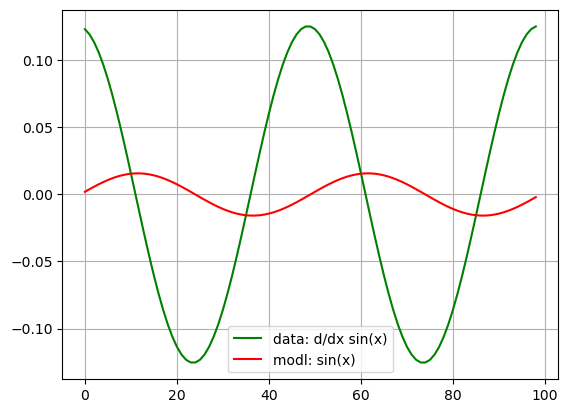

In [37]:
# adjoint test
modl.zero()
deri.adjoint(False,modl,data)

# plot the model and its adjoint result (should be the integral of the model)
plt.figure()
plt.plot(data.getNdArray()[1:-1], 'g-', label='data: d/dx sin(x)')
plt.plot(modl.getNdArray()[1:-1], 'r-', label='modl: sin(x)')
plt.legend()
plt.grid()

In [38]:
# 

# 